<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Week- 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [4]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.3 in c:\users\lenovo\anaconda3\lib\site-packages (from matplotlib>=3.0.0->mlxtend) (2.4.7)



In [1]:
# type your code here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

import scipy.stats as st

from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

#### Read the data

Load the csv file and print the first five observations.

In [4]:
df_diamond = pd.read_csv('D:/Engineering Documents/Great Learnig/PGP-DSE/DataSets/diamond_data.csv')

df_diamond.head()

,carat,cut,color,depth,table,price,x,y,z
0,0.30,Good,F,61.1,61.0,682,4.29,4.32,2.63
1,0.72,Ideal,H,62.0,56.0,2443,5.80,5.74,3.58
2,1.71,Premium,J,62.9,58.0,8848,7.64,7.58,4.79
3,1.01,Premium,E,59.2,59.0,7287,6.67,6.60,3.93
4,0.52,Ideal,D,62.7,56.0,1720,5.17,5.14,3.23


In [5]:
df_diamond.shape

(1547, 9)

In [6]:
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   1547 non-null   float64
 1   cut     1547 non-null   object 
 2   color   1547 non-null   object 
 3   depth   1547 non-null   float64
 4   table   1547 non-null   float64
 5   price   1547 non-null   int64  
 6   x       1547 non-null   float64
 7   y       1547 non-null   float64
 8   z       1547 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 108.9+ KB


Our objective is to predict the price of the diamond.

**The data definition is as follows:** <br>

**carat**: Weight of the diamond

**cut**: Quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: Diamond color

**depth**: Total depth percentage (it is calculated as: 2 * z / (x + y))

**table**: Width of top of the diamond relative to the widest point 

**price**: Price of a diamond in US dollars (target/dependent variable)

**x**: Length of a diamond in mm

**y**: Width of a diamond in mm

**z**: Depth of a diamond in mm

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the variable representing the width of a diamond skewed? If yes, apply an appropriate technique to make the distribution less skewed </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
df_diamond.columns

Index(['carat', 'cut', 'color', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

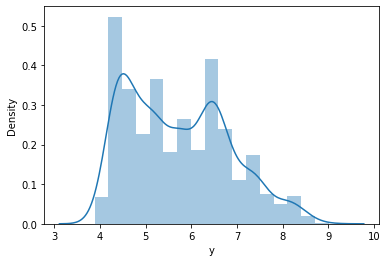

0.4383878452014628


In [8]:
sns.distplot(df_diamond['y'])
plt.show()

print(df_diamond['y'].skew())

# Yes WIdth feature is Right Skewed

In [9]:
df_diamond['boxcox_y'] =  st.boxcox(df_diamond['y'])[0]

df_diamond['boxcox_y'].skew()

0.033020411524122724

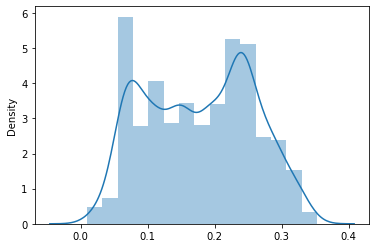

0.033020411524122724


In [10]:
sns.distplot(st.boxcox(df_diamond['boxcox_y'])[0])
plt.show()

print(df_diamond['boxcox_y'].skew())

**Skewness reduced after treating with BOXCOX Transformation**

In [11]:
df_diamond = df_diamond.drop('boxcox_y',axis=1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full model and check whether the errors have a serial correlation or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
x = df_diamond.drop('price',axis=1)


y= df_diamond['price']

In [14]:
df_num = df_diamond.select_dtypes(include = np.number)
df_cat = df_diamond.select_dtypes(exclude = np.number)

print(df_num.columns)
print(df_cat.columns)

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
Index(['cut', 'color'], dtype='object')


In [15]:
enoded_data = pd.get_dummies(data = df_cat,drop_first=True)
enoded_data.head(4)

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,1,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1
3,0,0,1,0,1,0,0,0,0,0


In [16]:
x_diamond = pd.concat ([df_num,enoded_data],axis=1)

x_diamond = sm.add_constant(x_diamond)

x_diamond.head(5)

,const,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J
0,1.0,0.30,61.1,61.0,682,4.29,4.32,2.63,1,0,0,0,0,1,0,0,0,0
1,1.0,0.72,62.0,56.0,2443,5.80,5.74,3.58,0,1,0,0,0,0,0,1,0,0
2,1.0,1.71,62.9,58.0,8848,7.64,7.58,4.79,0,0,1,0,0,0,0,0,0,1
3,1.0,1.01,59.2,59.0,7287,6.67,6.60,3.93,0,0,1,0,1,0,0,0,0,0
4,1.0,0.52,62.7,56.0,1720,5.17,5.14,3.23,0,1,0,0,0,0,0,0,0,0


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x_diamond,y,test_size=0.3,random_state=1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1082, 18)
(1082,)
(465, 18)
(465,)


In [18]:
x_train = sm.add_constant(x_train)
mlr_full_model = sm.OLS(y_train,x_train).fit()

print(mlr_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.899e+30
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:20:51   Log-Likelihood:                 25691.
No. Observations:                1082   AIC:                        -5.135e+04
Df Residuals:                    1064   BIC:                        -5.126e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.455e-11   9.33e-11      0.156

 Since Durbin Watson score is 0.110 , we can confirm that the errors have high serial Corelation  and Condition number is also high

In [20]:
cond_No = np.format_float_positional(1.54e+06)

cond_No

'1540000.'

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Add the features one-by-one to obtain the set of features which explains the price of a diamond with the highest accuracy
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
from sklearn.linear_model import LinearRegression

In [25]:
linreg = LinearRegression()

sfs_forward = sfs(estimator = linreg , k_features=6,forward = True,verbose = 2,scoring = 'r2')

sfs_forward_features = sfs_forward.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished

[2022-02-26 11:23:47] Features: 1/6 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2022-02-26 11:23:48] Features: 2/6 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished

[2022-02-26 11:23:48] Features: 3/6 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

In [26]:
sfs_forward_features.k_feature_names_

('const', 'carat', 'depth', 'table', 'price', 'x')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Use the 4-fold cross validation method and compute the coefficient of determination for each model
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
from sklearn.linear_model import LinearRegression

In [27]:
cross_val_score(estimator = LinearRegression(),X=x_train,y=y_train,cv=4,scoring='r2')

array([1., 1., 1., 1.])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the most insignificant numerical variable among all the numeric variables in the data
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
df_diamond.std()

carat       0.475814
depth       1.439904
table       2.235772
price    4117.039798
x           1.126730
y           1.116477
z           0.693149
dtype: float64

In [32]:
print(sm.OLS(y_train,x_train).fit().summary())

# Depth is the most insignifcant numerical variable among others.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.899e+30
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:28:23   Log-Likelihood:                 25691.
No. Observations:                1082   AIC:                        -5.135e+04
Df Residuals:                    1064   BIC:                        -5.126e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.455e-11   9.33e-11      0.156

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Do the residuals obtained from the full model follow a normal distribution?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
mlr_full_model.resid

303    -1.227818e-11
1496   -1.398348e-11
216    -1.000444e-11
730    -1.341505e-11
426    -9.094947e-12
            ...     
715    -1.000444e-11
905    -1.386979e-11
1096   -1.330136e-11
235    -1.386979e-11
1061   -1.364242e-11
Length: 1082, dtype: float64

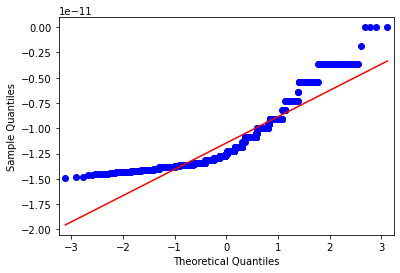

In [34]:
qqplot(data = mlr_full_model.resid, line ='r')

plt.show()

# Normality Not detected

Data is Not Normally distributed

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Is it possible to make the residuals normal? If yes, do the needful
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
df_diamond.columns

Index(['carat', 'cut', 'color', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

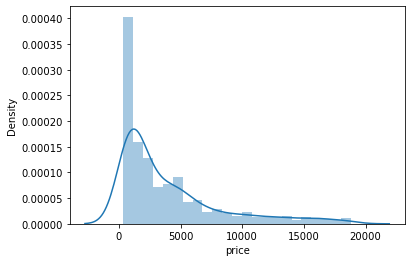

1.6459284129780143


In [39]:
sns.distplot(y_train)
plt.show()

print(y_train.skew())

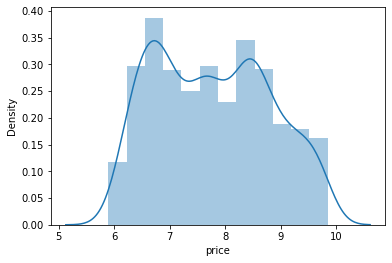

0.4983046098012058


In [40]:
sns.distplot(np.log(y_train))
plt.show()

print(np.log(y_train.skew()))

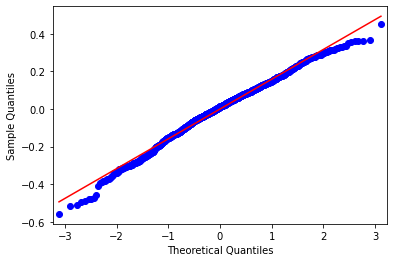

In [42]:
qqplot(sm.OLS(np.log(y_train),x_train).fit().resid,line='r')
plt.show()

In [43]:
# Model is Normal After Log Transformation of Target Variable

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Consider the full model and remove the variables one-by-one to obtain the set of seven most significant variables
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [44]:
linreg = LinearRegression()

sfs_backward = sfs(estimator = linreg, k_features = 7 ,forward = False, verbose = 2, scoring = 'r2')

In [45]:
sfs_backward_features = sfs_backward.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.2s finished

[2022-02-26 11:32:58] Features: 17/7 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.2s finished

[2022-02-26 11:32:59] Features: 16/7 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.3s finished

[2022-02-26 11:32:59] Features: 15/7 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:  

In [46]:
sfs_backward_features.k_feature_names_

('const', 'carat', 'depth', 'table', 'price', 'x', 'y')

In [47]:
sfs_backward_features.k_score_

1.0

In [30]:
# The sevent most significant variables are const,carat,depth,table,price,x,y

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the colors of a diamond that are not significant while predicting the price?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [48]:
df_diamond.color.unique()

array(['F', 'H', 'J', 'E', 'D', 'G', 'I'], dtype=object)

In [59]:
encode_color = pd.get_dummies(df_diamond['color'],drop_first=True)

X= pd.DataFrame(encode_color)

X =  sm.add_constant(X)

X.head()

,const,E,F,G,H,I,J
0,1.0,0,1,0,0,0,0
1,1.0,0,0,0,1,0,0
2,1.0,0,0,0,0,0,1
3,1.0,1,0,0,0,0,0
4,1.0,0,0,0,0,0,0


In [63]:
color_model = sm.OLS(df_diamond['price'],X).fit()

print(color_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     6.554
Date:                Sat, 26 Feb 2022   Prob (F-statistic):           7.55e-07
Time:                        11:41:30   Log-Likelihood:                -15051.
No. Observations:                1547   AIC:                         3.012e+04
Df Residuals:                    1540   BIC:                         3.015e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3590.7087    283.805     12.652      0.0

In [76]:
l1 = color_model.pvalues
l2= []
for i in l1:
    if i > 0.05 :
        l2.append(i)
print(l2)

[0.1791163602723742, 0.9953122277285182, 0.3912728912668866]


Colr E , F , G are not significant while predicting the Price of the Gold

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a regression model on the five features obtained by eliminating the features recursively 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
rfe_model = RFE(estimator = LinearRegression(), n_features_to_select = 5)
imp_feat = pd.DataFrame()
imp_feat['Feature'] = x_train.columns

rfe_mode_model = rfe_model.fit(x_train,y_train)


imp_feat['Ranking'] = rfe_mode_model.ranking_
imp_feat.sort_values(by = 'Ranking', ascending = True)


,Feature,Ranking
1,carat,1
2,depth,1
4,price,1
5,x,1
6,y,1
7,z,2
15,color_H,3
8,cut_Good,4
9,cut_Ideal,5
11,cut_Very Good,6


In [50]:
imp_feat_list = list(imp_feat[imp_feat['Ranking'] == 1].Feature)

In [51]:
linreg = LinearRegression()
linreg.fit(x_train[imp_feat_list], y_train)

LinearRegression()

In [52]:
linreg.score(x_train[imp_feat_list], y_train)


1.0